In [1]:
## Important Options:
run_epochs = 300
run_model_type = "full_y_CVAE"

run_save_folder = "../../outputs/experiments_test/freyfaces/cvae/" 
run_read_data_folder = "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "50_samples_per_class" # 5; 10; 25, 50;


In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --kl-anneal \
    --kl-anneal-start 0.0 \
    --kl-anneal-stop 1.0 \
    --kl-anneal-ratio 0.2 \
    --kl-anneal-delay-epochs 10 \
    --fixed-prior-zy1-sigma 0.2 \
    --use-q-z-y \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_frey_faces/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=0.2, kl_anneal=True, kl_anneal_cycles=1, kl_anneal_delay_epochs=10, kl_anneal_ratio=0.2, kl_anneal_start=0.0, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='full_y_CVAE', number_epochs=300, output_folder='../../outputs/experiments_test/freyfaces/cvae/', q_y_x_coeff=1.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=False, sigma_eps_z_in=0.1, size_input=560, size_output=560, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='50_samples_per_class', use_batch_norm=False, u

### Define Paths

In [4]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [5]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [6]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [7]:
ls "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_noise_dict.json
trusted_idxs_10_samples_per_class.csv


### Check VARS on Notebook

In [8]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.7)
compute_metrics        function         <function compute_metrics at 0x7f647c820790>
dict_main_vars         dict             n=53
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7f63347733a0>
file_path_data         str              ../../data/examples_frey_<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>eyfaces/cvae/full_y_CVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7f6336f16940>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [9]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'delay_beta_vec', '_delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [10]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import full_y_CVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [11]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 256,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': False},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 1965,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 5,
                 'percentages': [1.2722646310432568,
                                 2.5445292620865136,
                                 6.361323155216285,
                                 12.72264631043257],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [25, 50, 125, 250],
                 'use_labels': 'joint_classes'

In [12]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 20]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [13]:


# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [14]:
args.data_folder

'../../data/examples_frey_faces/corrupt_level_35_percent/run_1/'

In [15]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,20)

y_targets_mdl = ~ torch.from_numpy(y_noise_instance_train).view(-1,1)

x_train_orig = X_train.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [16]:
dataset_obj.cont_means

154.0488358778626

In [17]:
dataset_obj.cont_stds

48.54248012196572

In [18]:
X_train_clean.view(-1,28,20)

tensor([[[-3.3061e-01,  3.2860e-01,  4.9341e-01,  ..., -9.8983e-01,
          -1.0310e+00,  8.1396e-02],
         [-8.6623e-01,  1.6380e-01,  3.2860e-01,  ..., -6.6022e-01,
          -1.1546e+00, -2.1607e-02],
         [-9.0743e-01,  1.2260e-01,  2.8740e-01,  ..., -3.3061e-01,
          -1.2370e+00, -1.2461e-01],
         ...,
         [ 8.1396e-02, -2.0701e-01, -4.9542e-01,  ...,  9.6722e-01,
           8.6422e-01,  6.9941e-01],
         [ 6.0795e-02, -1.0401e-01, -5.3662e-01,  ...,  9.0542e-01,
           8.6422e-01,  6.9941e-01],
         [ 1.9594e-02, -1.0401e-01, -5.1602e-01,  ...,  9.4662e-01,
           8.4361e-01,  6.5821e-01]],

        [[ 2.6680e-01,  6.7881e-01,  7.6121e-01,  ..., -8.0443e-01,
          -1.6284e+00, -3.9242e-01],
         [ 1.4320e-01,  5.5521e-01,  5.9641e-01,  ..., -1.2461e-01,
          -1.8551e+00, -4.1302e-01],
         [ 1.4320e-01,  4.3160e-01,  5.3461e-01,  ...,  3.2860e-01,
          -1.8963e+00, -5.3662e-01],
         ...,
         [-2.8941e-01, -1

### Load Model

In [19]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (var_q_z): encodeMVNDiag(
    (torso_encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=561, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (param_nn): GaussDiagDistModule(
      (mu): modSeq(
        (mods_list): ModuleList(
          (0): baseEncoder(
            (activ): ReLU()
            (feat_embedd): ModuleList()
            (mod_fw_seq): Sequential(
              (fc_0): Linear(in_features=561, out_features=200, bias=True)
              (activ_0): ReLU()
              (fc_1): Linear(in_features=200, out_features=100, bias=True)
              (activ_1): ReLU()
              (fc_2): Linear(in_features=100, out_features=50, bias=True)
              (ac

### Load Results from Folder

In [20]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [21]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [22]:
df_train_metrics

,Epochs,Avg. TOTAL_LOSS,Avg. LOSS_ELBO,Avg. LOSS_SUP,Avg. NLL,Avg. KLD_TOT,Avg. KLD_Z,AUC Cell nll score,AVPR Cell nll score,AUC Row nll score,AVPR Row nll score,AUC Row class_y score,AVPR Row class_y score,Error lower-bound on dirty pos,Error upper-bound on dirty pos,Error repair on dirty pos,Error repair on clean pos,Error repair on clean pos - dirty points
0,1,138.070698,138.070698,0.0,138.070698,1148.413640,1148.413640,0.990039,0.887198,0.926035,0.858162,-10.0,-10.0,0.850212,21.566447,0.949936,0.671203,0.703491
1,2,125.211617,125.211617,0.0,125.211617,613.266224,613.266224,0.995635,0.927669,0.930362,0.868229,-10.0,-10.0,0.642619,21.566447,0.661973,0.581478,0.577035
2,3,116.494338,116.494338,0.0,116.494338,678.827305,678.827305,0.993642,0.906859,0.913820,0.840075,-10.0,-10.0,0.683540,21.566447,0.728166,0.569644,0.572273
3,4,110.592048,110.592048,0.0,110.592048,949.447504,949.447504,0.985549,0.856090,0.905617,0.827755,-10.0,-10.0,0.691148,21.566447,0.782221,0.565176,0.580760
4,5,108.435857,108.435857,0.0,108.435857,1038.008387,1038.008387,0.990593,0.885737,0.910374,0.832958,-10.0,-10.0,0.656004,21.566447,0.723566,0.554198,0.562455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,-608.607417,-608.607417,0.0,-639.637798,31.030384,31.030384,0.520835,0.095909,0.593931,0.385712,-10.0,-10.0,0.115282,21.566447,0.637939,0.111500,0.194811
296,297,-601.502628,-601.502628,0.0,-632.810885,31.308255,31.308255,0.538695,0.104116,0.593124,0.386277,-10.0,-10.0,0.117852,21.566447,0.694714,0.112225,0.193097
297,298,-599.719902,-599.719902,0.0,-631.387795,31.667903,31.667903,0.557784,0.113014,0.616814,0.401776,-10.0,-10.0,0.117613,21.566447,0.740130,0.113139,0.197002
298,299,-608.625060,-608.625060,0.0,-640.409582,31.784522,31.784522,0.527809,0.101502,0.598030,0.389629,-10.0,-10.0,0.117721,21.566447,0.711501,0.111253,0.193483


In [23]:
df_valid_metrics

,Epochs,Avg. TOTAL_LOSS,Avg. LOSS_ELBO,Avg. LOSS_SUP,Avg. NLL,Avg. KLD_TOT,Avg. KLD_Z,AUC Cell nll score,AVPR Cell nll score,AUC Row nll score,AVPR Row nll score,AUC Row class_y score,AVPR Row class_y score,Error lower-bound on dirty pos,Error upper-bound on dirty pos,Error repair on dirty pos,Error repair on clean pos,Error repair on clean pos - dirty points
0,1,137.728077,137.728077,0.0,137.728077,1183.300383,1183.300383,0.989697,0.912347,0.949651,0.931881,-10.0,-10.0,1.102384,27.724494,1.298373,0.703715,0.741137
1,2,124.805724,124.805724,0.0,124.805724,625.713927,625.713927,0.996014,0.951231,0.956200,0.940470,-10.0,-10.0,0.681025,27.724494,0.725223,0.570125,0.564922
2,3,115.441591,115.441591,0.0,115.441591,697.457928,697.457928,0.994094,0.940527,0.939667,0.914242,-10.0,-10.0,0.767537,27.724494,0.854514,0.564589,0.566986
3,4,109.347709,109.347709,0.0,109.347709,989.907047,989.907047,0.985816,0.890846,0.933548,0.907063,-10.0,-10.0,0.812702,27.724494,0.972063,0.562763,0.575661
4,5,107.029785,107.029785,0.0,107.029785,1081.690569,1081.690569,0.990864,0.916784,0.937091,0.910043,-10.0,-10.0,0.749253,27.724494,0.871938,0.546533,0.553145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,-515.306999,-515.306999,0.0,-545.993264,30.686242,30.686242,0.537082,0.151956,0.621685,0.493406,-10.0,-10.0,0.104418,27.724494,0.870106,0.151011,0.243547
296,297,-506.974570,-506.974570,0.0,-537.960360,30.985801,30.985801,0.531740,0.138859,0.624369,0.501716,-10.0,-10.0,0.106279,27.724494,0.925523,0.151935,0.242463
297,298,-501.576052,-501.576052,0.0,-533.053811,31.477753,31.477753,0.561225,0.161960,0.642083,0.513651,-10.0,-10.0,0.107207,27.724494,1.026051,0.153351,0.246887
298,299,-513.399892,-513.399892,0.0,-544.914860,31.514966,31.514966,0.534526,0.146319,0.624155,0.498281,-10.0,-10.0,0.108763,27.724494,0.944305,0.150309,0.240432


In [24]:
df_test_metrics

,Epochs,Avg. TOTAL_LOSS,Avg. LOSS_ELBO,Avg. LOSS_SUP,Avg. NLL,Avg. KLD_TOT,Avg. KLD_Z,AUC Cell nll score,AVPR Cell nll score,AUC Row nll score,AVPR Row nll score,AUC Row class_y score,AVPR Row class_y score,Error lower-bound on dirty pos,Error upper-bound on dirty pos,Error repair on dirty pos,Error repair on clean pos,Error repair on clean pos - dirty points
0,1,137.728077,137.728077,0.0,137.728077,1183.300383,1183.300383,0.989697,0.912347,0.949651,0.931881,-10.0,-10.0,1.102384,27.724494,1.298373,0.703715,0.741137
1,2,124.805724,124.805724,0.0,124.805724,625.713927,625.713927,0.996014,0.951231,0.956200,0.940470,-10.0,-10.0,0.681025,27.724494,0.725223,0.570125,0.564922
2,3,115.441591,115.441591,0.0,115.441591,697.457928,697.457928,0.994094,0.940527,0.939667,0.914242,-10.0,-10.0,0.767537,27.724494,0.854514,0.564589,0.566986
3,4,109.347709,109.347709,0.0,109.347709,989.907047,989.907047,0.985816,0.890846,0.933548,0.907063,-10.0,-10.0,0.812702,27.724494,0.972063,0.562763,0.575661
4,5,107.029785,107.029785,0.0,107.029785,1081.690569,1081.690569,0.990864,0.916784,0.937091,0.910043,-10.0,-10.0,0.749253,27.724494,0.871938,0.546533,0.553145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,-515.306999,-515.306999,0.0,-545.993264,30.686242,30.686242,0.537082,0.151956,0.621685,0.493406,-10.0,-10.0,0.104418,27.724494,0.870106,0.151011,0.243547
296,297,-506.974570,-506.974570,0.0,-537.960360,30.985801,30.985801,0.531740,0.138859,0.624369,0.501716,-10.0,-10.0,0.106279,27.724494,0.925523,0.151935,0.242463
297,298,-501.576052,-501.576052,0.0,-533.053811,31.477753,31.477753,0.561225,0.161960,0.642083,0.513651,-10.0,-10.0,0.107207,27.724494,1.026051,0.153351,0.246887
298,299,-513.399892,-513.399892,0.0,-544.914860,31.514966,31.514966,0.534526,0.146319,0.624155,0.498281,-10.0,-10.0,0.108763,27.724494,0.944305,0.150309,0.240432


In [25]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [26]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -599.702393
Avg. LOSS_ELBO                             -599.702393
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -630.410877
Avg. KLD_TOT                                 30.708477
Avg. KLD_Z                                   30.708477
AUC Cell nll score                            0.511809
AVPR Cell nll score                           0.095483
AUC Row nll score                             0.586755
AVPR Row nll score                            0.380504
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.117229
Error upper-bound on dirty pos               21.566447
Error repair on dirty pos                     0.649964
Error repair on clean pos                     0.115265
Error repair on clean pos - dirty points      0.201381
Name: 299,

In [27]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -501.953065
Avg. LOSS_ELBO                             -501.953065
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -532.326969
Avg. KLD_TOT                                 30.373896
Avg. KLD_Z                                   30.373896
AUC Cell nll score                            0.534424
AVPR Cell nll score                           0.151992
AUC Row nll score                             0.616425
AVPR Row nll score                            0.494703
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.106594
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                     0.905415
Error repair on clean pos                     0.155201
Error repair on clean pos - dirty points      0.250044
Name: 299,

### Test Dataset Final Results

In [28]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -501.953065
Avg. LOSS_ELBO                             -501.953065
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -532.326969
Avg. KLD_TOT                                 30.373896
Avg. KLD_Z                                   30.373896
AUC Cell nll score                            0.534424
AVPR Cell nll score                           0.151992
AUC Row nll score                             0.616425
AVPR Row nll score                            0.494703
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.106594
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                     0.905415
Error repair on clean pos                     0.155201
Error repair on clean pos - dirty points      0.250044
Name: 299,

## PLOTS TRAIN DATASET

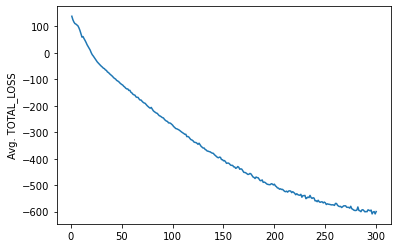

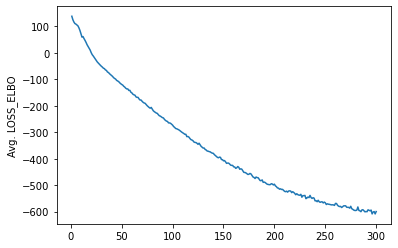

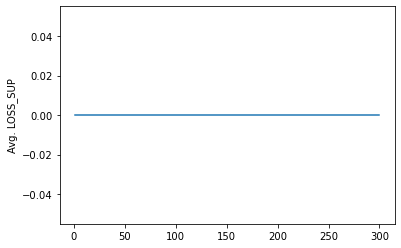

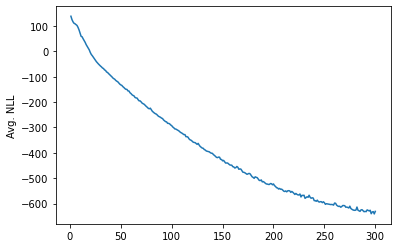

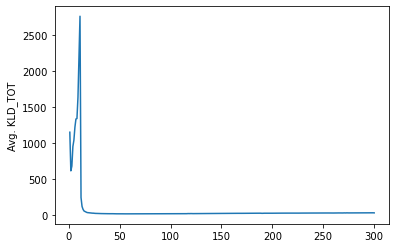

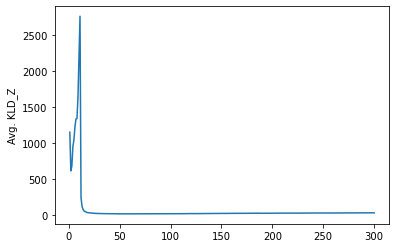

In [29]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

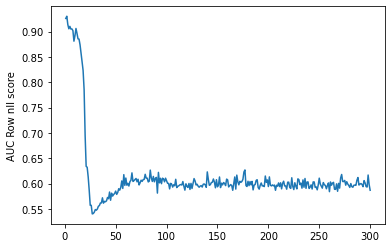

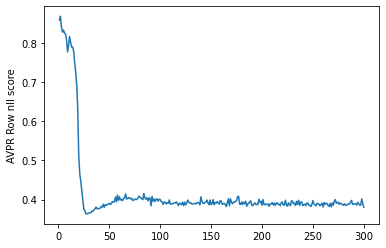

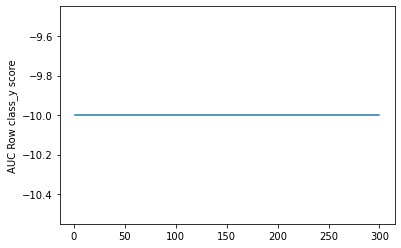

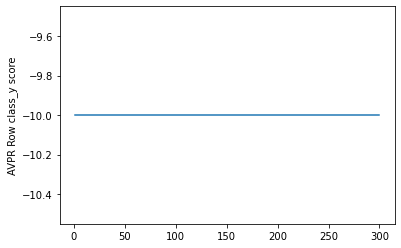

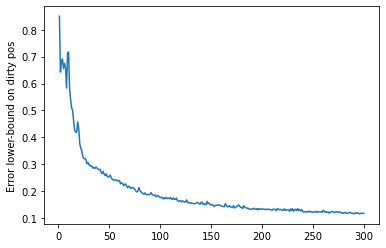

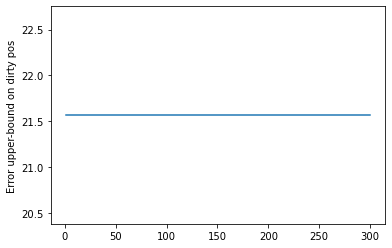

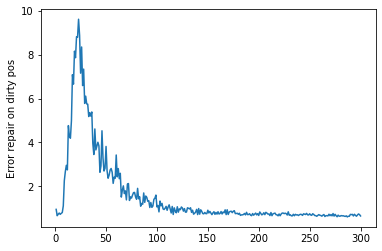

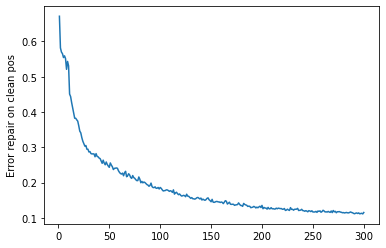

In [30]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

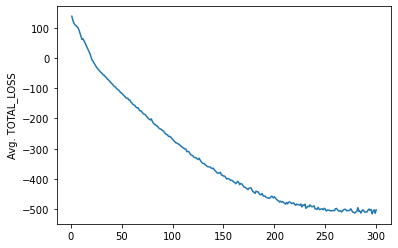

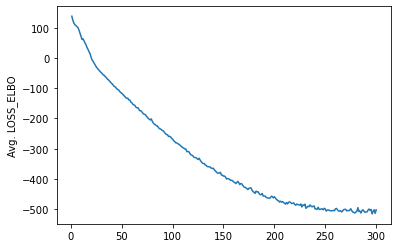

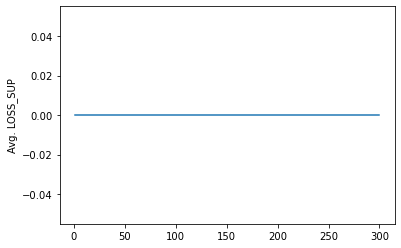

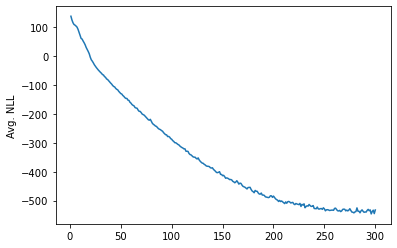

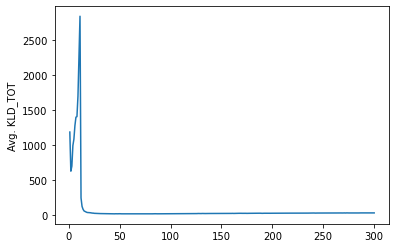

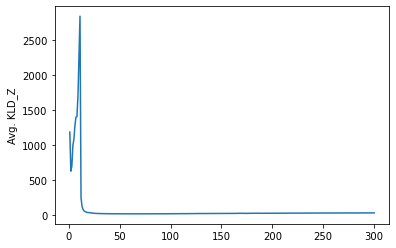

In [31]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

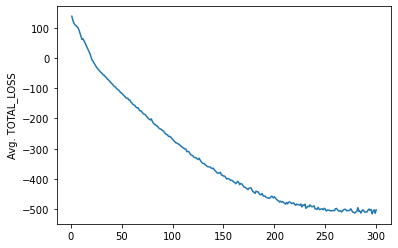

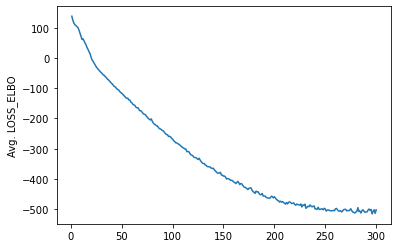

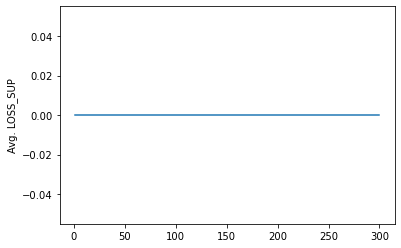

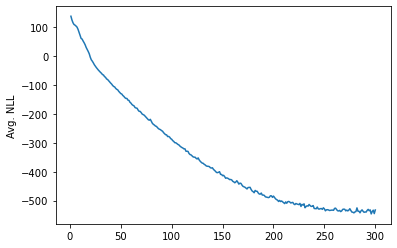

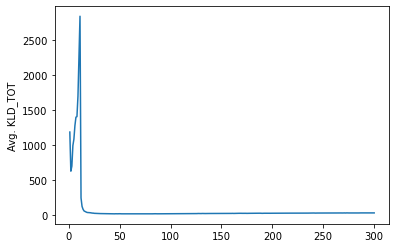

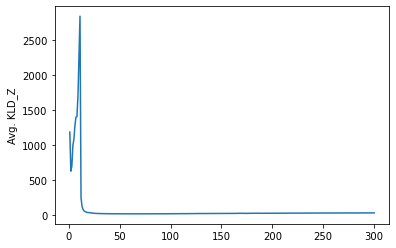

In [32]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [33]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train, y_targets=y_targets_mdl, repair_mode=True)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy()


In [34]:
# Show recon logvar
vae_p_params_xd['recon']['logvar_x'].exp()

tensor([0.0434], grad_fn=<ExpBackward>)

In [35]:
# Plot mu's and covariance's

z_train_mu = vae_q_params['z']['mu'].detach().cpu().numpy()
z_train_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy())

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_var, axis=0)))
print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_mu, axis=0)))


median of variances (per dim), clean: 
 [5.59813343e-03 1.01403552e-04 9.47820226e-05 4.04396430e-02
 3.99235971e-02 2.34184205e-04 1.16084964e-04 1.43765297e-04
 3.96592170e-02 1.70901563e-04 7.99878035e-05 2.45376927e-04
 3.27046169e-03 4.29141335e-02 4.77613648e-04] 

median of means (per dim), clean: 
 [-0.02934445 -0.04454064  0.01227632  0.00379209 -0.00340698  0.02532329
  0.0213903   0.00536821  0.00152146 -0.01197592 -0.02817707  0.03167787
  0.02274528 -0.00701023 -0.01311497] 



### Recons

In [36]:
recon_imgs_train = recons_train.reshape(-1,28,20)*dataset_obj.cont_stds + dataset_obj.cont_means

In [37]:
dataset_obj.cont_means

154.0488358778626

In [38]:
dataset_obj.cont_stds

48.54248012196572

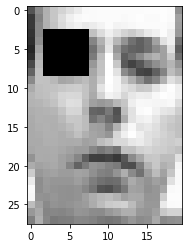

In [39]:
# Show image from train dataset

plt.imshow(x_train_orig[546], cmap="gray",)

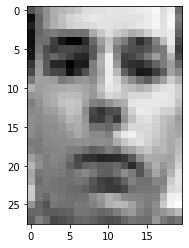

In [40]:
# Show image reconstruction from CVAE model

plt.imshow(np.around(recon_imgs_train[546]), cmap="gray", )

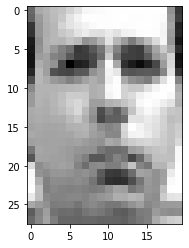

In [41]:
# Show image from train dataset

plt.imshow(x_train_orig[540], cmap="gray",)

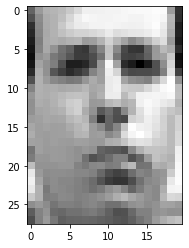

In [42]:
# Show image reconstruction from CVAE model

plt.imshow(np.around(recon_imgs_train[540]), cmap="gray", )

### Show Clean Datapoints at Random

y_noise: 0


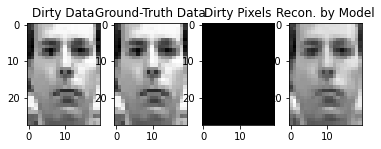

y_noise: 0


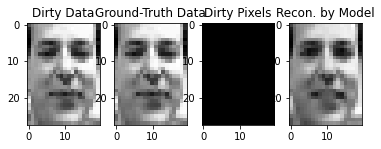

y_noise: 0


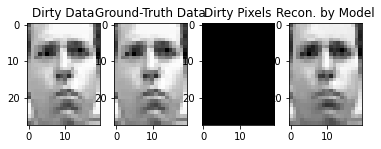

y_noise: 0


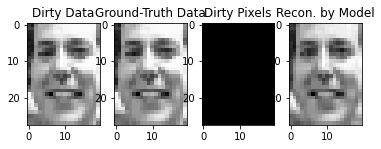

y_noise: 0


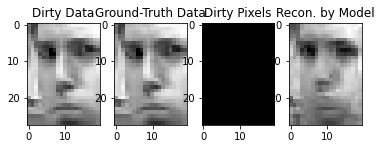

y_noise: 0


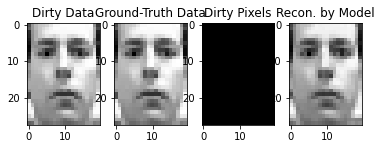

y_noise: 0


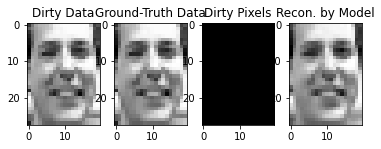

y_noise: 0


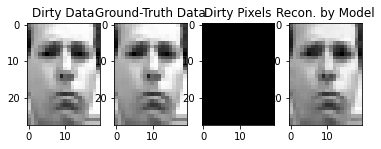

y_noise: 0


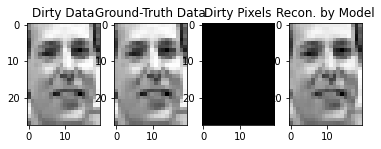

y_noise: 0


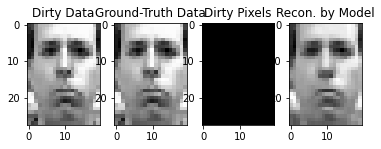

y_noise: 0


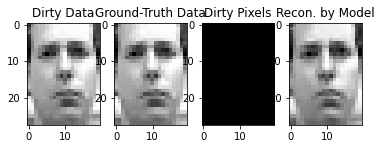

y_noise: 0


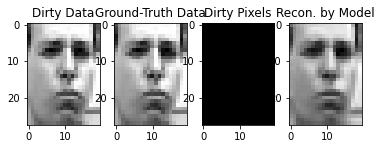

y_noise: 0


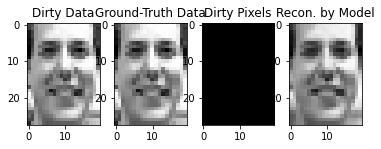

y_noise: 0


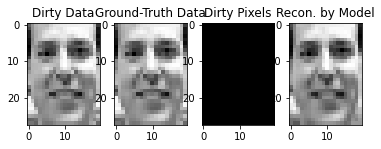

y_noise: 0


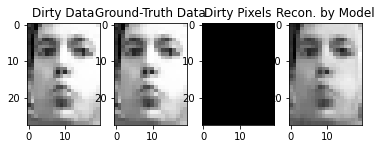

y_noise: 0


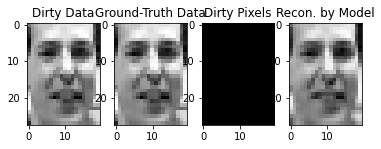

y_noise: 0


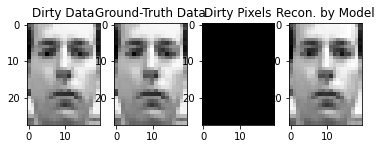

y_noise: 0


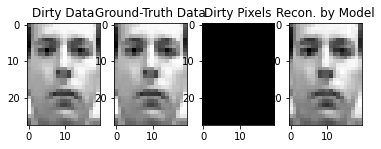

y_noise: 0


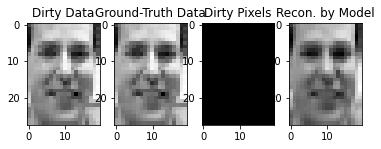

y_noise: 0


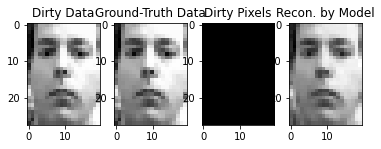

y_noise: 0


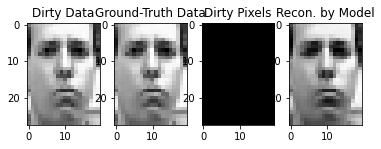

y_noise: 0


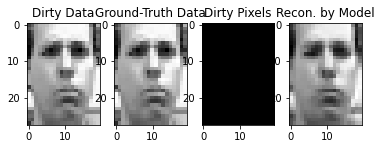

y_noise: 0


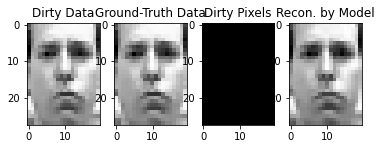

y_noise: 0


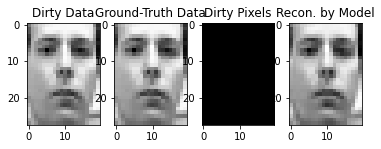

y_noise: 0


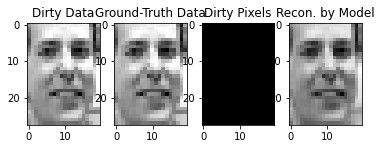

In [43]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Dirty Datapoints at Random

y_noise: 1


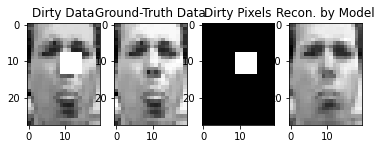

y_noise: 1


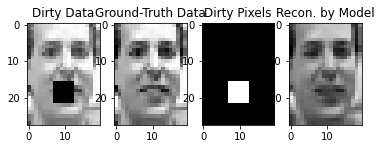

y_noise: 1


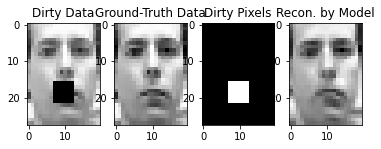

y_noise: 1


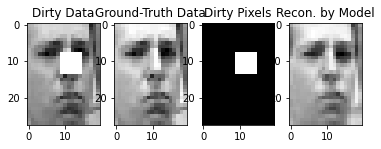

y_noise: 1


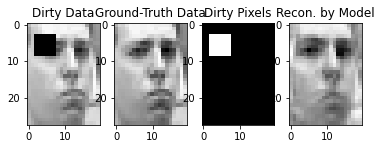

y_noise: 1


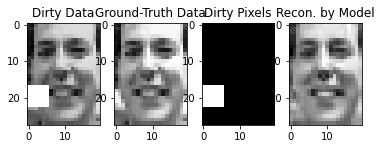

y_noise: 1


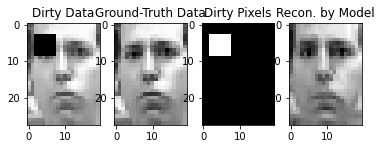

y_noise: 1


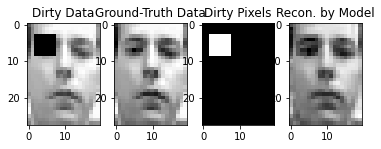

y_noise: 1


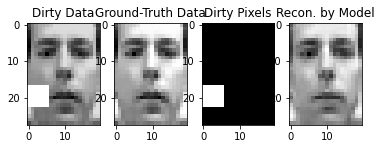

y_noise: 1


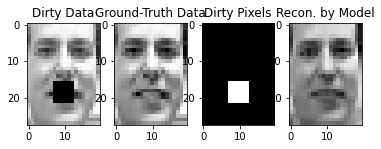

y_noise: 1


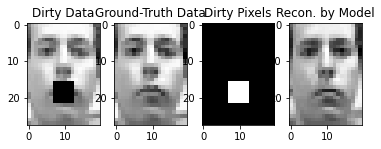

y_noise: 1


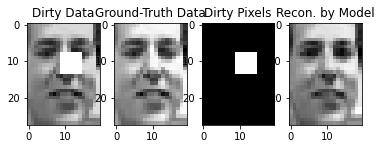

y_noise: 1


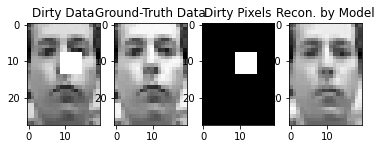

y_noise: 1


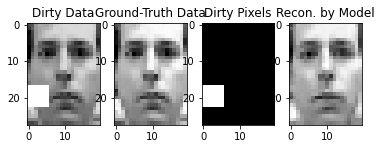

y_noise: 1


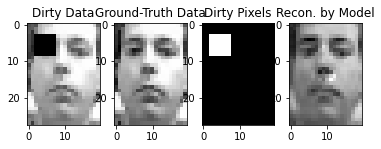

y_noise: 1


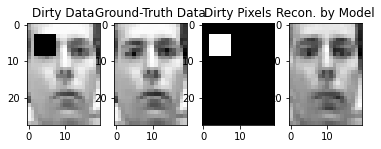

y_noise: 1


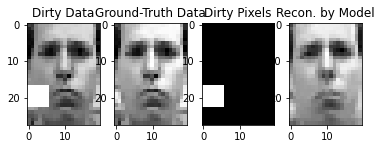

y_noise: 1


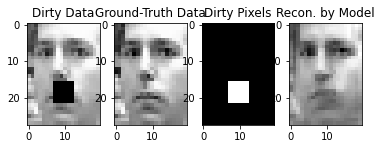

y_noise: 1


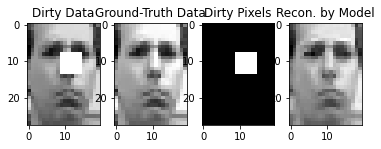

y_noise: 1


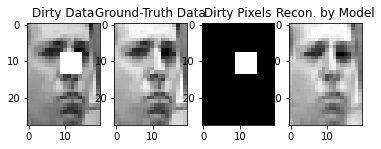

y_noise: 1


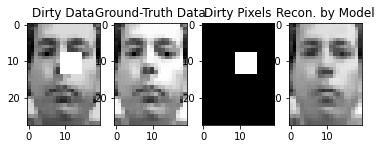

y_noise: 1


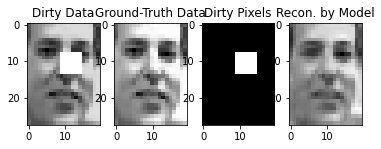

y_noise: 1


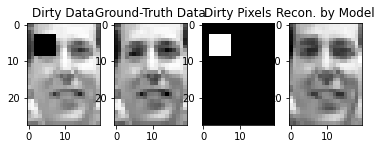

y_noise: 1


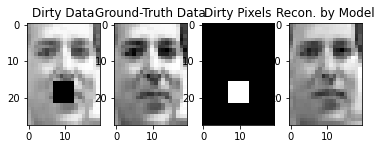

y_noise: 1


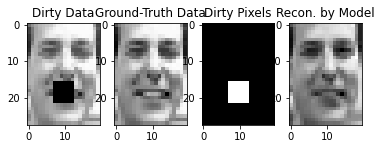

In [44]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[932, 474, 203, 1513, 1003, 1530, 303, 546, 1071, 760, 429, 1418, 1083, 287, 1348, 1140, 330, 1386, 885, 331, 895, 33, 705, 698, 558, 1427, 843, 1193, 746, 867, 1500, 671, 1415, 1130, 1304, 129, 937, 1118, 1372, 422, 523, 261, 1397, 1152, 953, 1349, 271, 872, 928, 779, 173, 1166, 21, 454, 399, 1391, 894, 797, 561, 1145, 1081, 1195, 554, 1554, 1208, 1317, 253, 6, 670, 1390, 456, 1550, 1061, 1436, 1199, 1232, 1562, 1339, 1393, 681, 1213, 248, 1244, 424, 92, 350, 1485, 919, 1279, 225, 644, 552, 179, 1464, 355, 403, 25, 88, 1478, 852, 854, 1139, 909, 1503, 148, 348, 1157, 300, 1340, 688, 916, 436, 1337, 112, 956, 347, 724, 265, 356, 1137, 817, 619, 929, 962, 368, 335, 1205, 259, 1553, 689]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


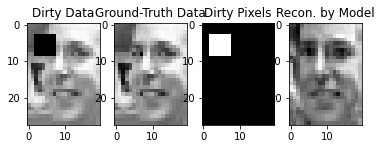

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


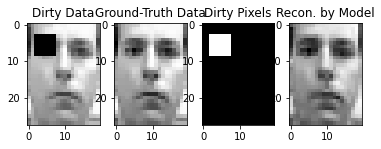

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


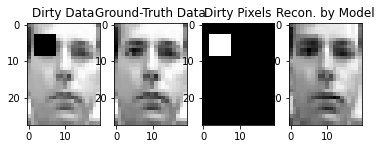

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


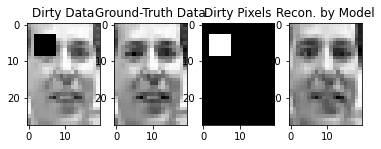

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


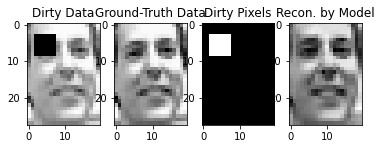

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


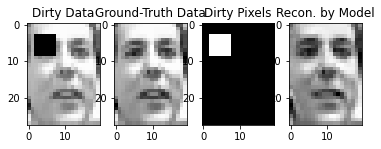

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


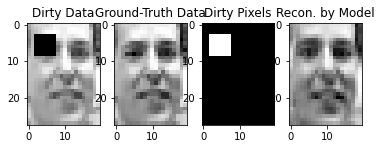

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


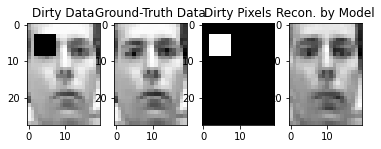

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


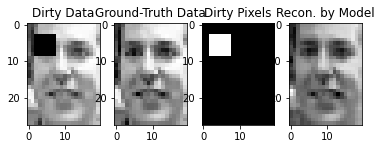

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


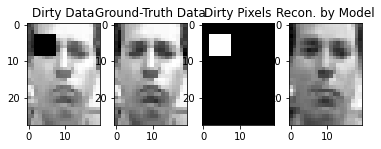







Noise Tag: 1
Noise Indices: 
[930, 1476, 650, 161, 45, 2, 1198, 1434, 616, 614, 150, 651, 162, 661, 1063, 100, 631, 1050, 328, 1128, 798, 1057, 1033, 1255, 384, 604, 756, 487, 816, 612, 1188, 493, 1214, 1223, 44, 1456, 636, 205, 164, 998, 1510, 295, 157, 773, 765, 1571, 8, 1266, 1173, 1442, 755, 1009, 1315, 1481, 396, 1286, 726, 1067, 1225, 250, 1566, 362, 800, 559, 1408, 483, 435, 841, 431, 70, 82, 514, 444, 34, 738, 234, 1169, 1074, 332, 570, 1020, 1264, 1399, 673, 1471, 1480, 397, 1298, 1398, 393, 1068, 499, 383, 116, 195, 196, 562, 281, 90, 1141, 1345, 285, 1184, 1191, 1330, 511, 305, 55, 1370, 473, 1552, 238, 278, 969, 1238, 1175, 732, 439, 402, 1319, 1308, 740, 188, 898, 596, 1116, 1343, 741, 1289, 211, 1196, 140, 1551, 1302, 1248, 1375, 730, 1052, 1377, 923, 1565, 1189, 1010, 450]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


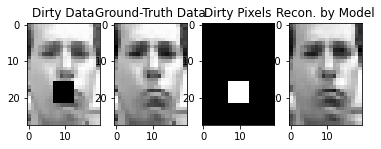

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


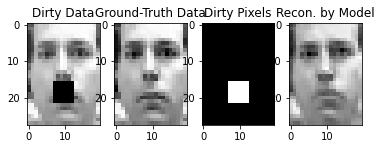

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


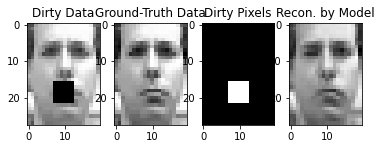

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


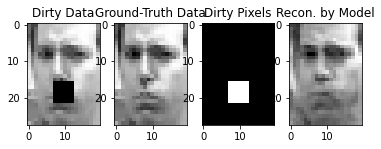

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


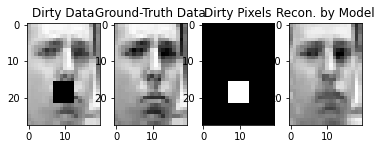

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


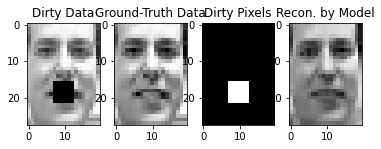

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


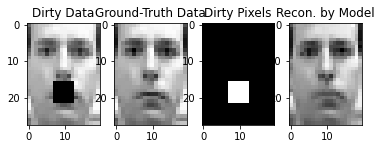

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


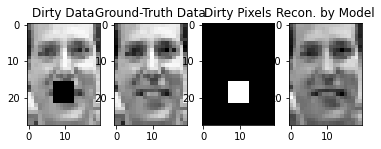

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


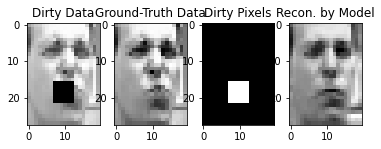

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


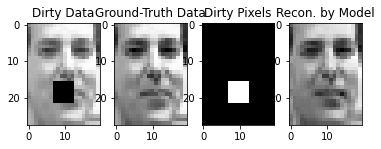







Noise Tag: 2
Noise Indices: 
[1004, 1093, 491, 252, 711, 1075, 1463, 68, 1369, 433, 158, 997, 375, 412, 1455, 1428, 597, 340, 7, 336, 538, 543, 390, 657, 500, 1371, 1096, 322, 957, 154, 10, 993, 13, 128, 497, 1546, 1406, 821, 121, 1262, 130, 1056, 676, 757, 634, 1328, 678, 1097, 1534, 708, 955, 795, 679, 943, 310, 587, 1525, 381, 859, 1219, 653, 857, 220, 57, 981, 451, 982, 845, 254, 411, 806, 582, 1030, 477, 1127, 298, 169, 42, 1462, 563, 1441, 547, 1103, 588, 663, 1294, 739, 759, 1338, 864, 703, 1438, 1320, 959, 617, 366, 938, 279, 1265, 1517, 319, 526, 1099, 96, 1007, 702, 472, 530, 1186, 230, 1104, 989, 822, 1569, 949, 1240, 1332, 975, 579, 1107, 1488, 1060, 1037, 625, 1494, 327, 1153, 379, 1300, 788, 176, 1344, 1496, 1042, 1439]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


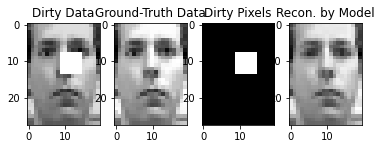

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


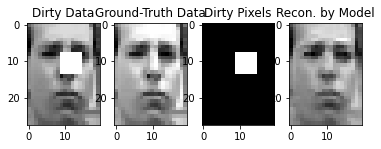

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


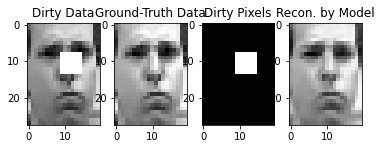

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


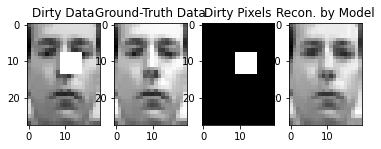

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


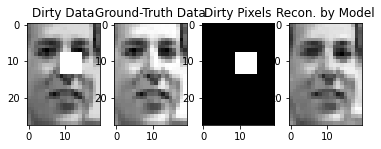

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


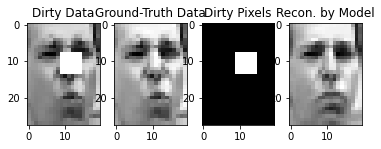

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


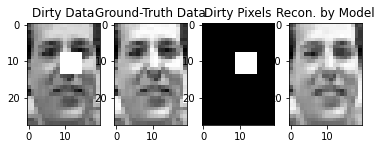

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


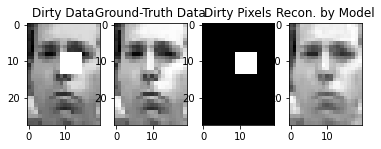

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


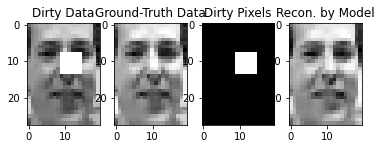

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


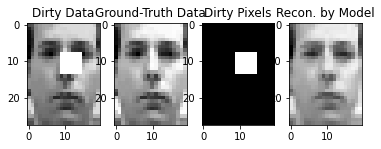







Noise Tag: 3
Noise Indices: 
[1079, 577, 476, 359, 312, 155, 1234, 388, 805, 231, 1498, 723, 1110, 1489, 633, 457, 308, 507, 1411, 697, 1365, 496, 1564, 1258, 525, 1101, 1172, 920, 181, 510, 1149, 1284, 27, 1417, 555, 1158, 413, 1201, 486, 802, 1549, 1402, 731, 1283, 437, 52, 245, 1251, 1453, 1531, 1380, 72, 753, 1495, 865, 288, 1492, 823, 660, 694, 1334, 1105, 1041, 210, 223, 520, 882, 110, 200, 1394, 1029, 835, 339, 301, 373, 296, 466, 1220, 1429, 1049, 1027, 1069, 1087, 896, 349, 1292, 907, 395, 1025, 1364, 1314, 830, 1414, 275, 601, 542, 191, 11, 1506, 446, 967, 360, 1072, 3, 40, 785, 808, 1450, 1121, 1293, 463, 610, 434, 803, 539, 479, 316, 1170, 1167, 1341, 700, 970, 1085, 971, 573]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


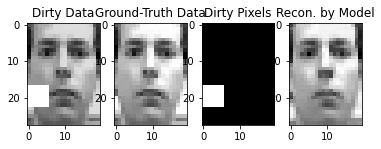

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


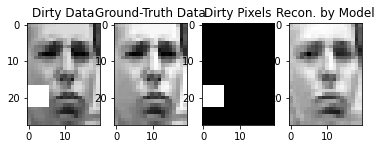

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


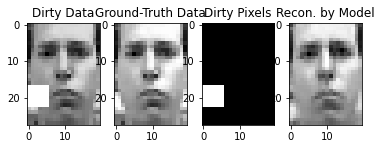

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


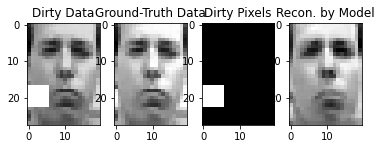

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


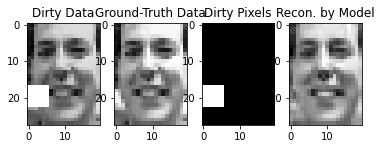

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


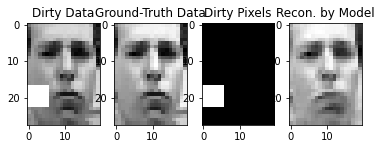

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


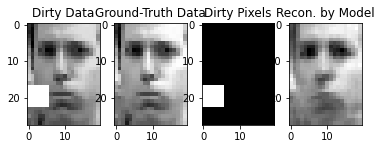

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


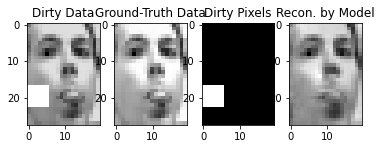

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


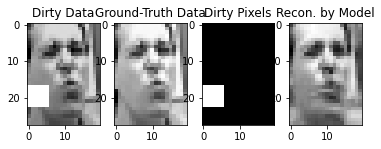

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


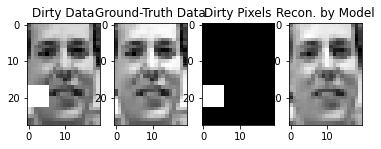

In [45]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")


### Show Latent Space

In [46]:
noised_rows = y_noise_instance_train
noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [47]:
from sklearn.decomposition import PCA

# Use underlying clean train data for representation
pca_2d_z = PCA(n_components=2) # PCA
pca_2d_z.fit(z_train_clean)

PCA(n_components=2)

In [48]:
pca_2d_z.explained_variance_

array([0.10720754, 0.08411044], dtype=float32)

In [49]:
z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D) for a clean q(z|x)')

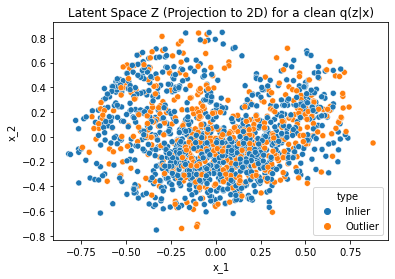

In [50]:
df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
                                   "x_2": z_train_pca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
plt.title("Latent Space Z (Projection to 2D) for a clean q(z|x)")

### Kernel PCA

In [51]:
from sklearn.decomposition import KernelPCA

# Use underlying clean train data for representation
kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
kpca_2d_z.fit(z_train_clean)

KernelPCA(degree=5, kernel='rbf', n_components=2)

In [52]:
z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D) for a clean q(z|x)')

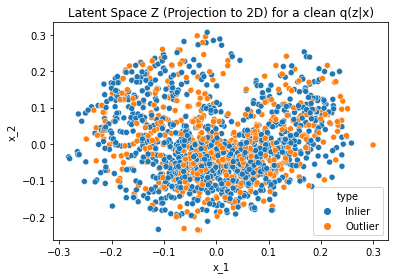

In [53]:
df_plot_z_kpca2d = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
                                   "x_2": z_train_kpca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d)
plt.title("Latent Space Z (Projection to 2D) for a clean q(z|x)")

#### T-SNE

In [54]:
from sklearn.manifold import TSNE

In [55]:
tsne_2d_z = TSNE(n_components=2, perplexity=250.0, n_iter=5000)
_z_all_2d = tsne_2d_z.fit_transform(z_train_clean)

In [56]:
_len_dataset = z_train_clean.shape[0]
z_train_tsne2d_clean = _z_all_2d

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D) for a clean q(z|x)')

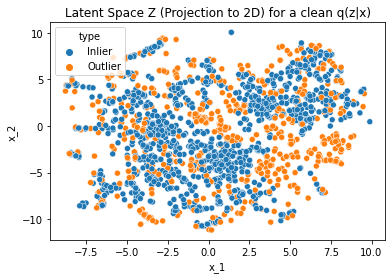

In [57]:
df_plot_z_tsne2d = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
                                   "x_2": z_train_tsne2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d)
plt.title("Latent Space Z (Projection to 2D) for a clean q(z|x)")

### Approx. Log-Likelihood -- via IWAE (Importance Weighted AE Loss)

In [58]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [59]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [60]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae = log_px_approx_eval(vae_mdl,
                                   dataset_obj,
                                   x_inputs,
                                   k_samples=250,
                                   y_comps=False,
                                   batch_size=128, 
                                   y_targets=y_targets_mdl.cuda(), 
                                   repair_mode=True)

    # to clear GPU Mem -- if used.
    log_px_est = elbo_iwae.clone().cpu()
    
    del elbo_iwae
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 13/13 [00:00<00:00, 39.42it/s]


In [61]:
# print(prof)

In [62]:
arrs_elbo_iwae = np.concatenate([log_px_est, y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [63]:
df_elbo_iwae

,log_px,noise_label
0,455.106537,clean
1,611.621826,clean
2,-2311.361572,dirty
3,-1626.324829,dirty
4,446.408752,clean
...,...,...
1567,769.736145,clean
1568,615.615112,clean
1569,-1111.175171,dirty
1570,728.218933,clean


In [64]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)


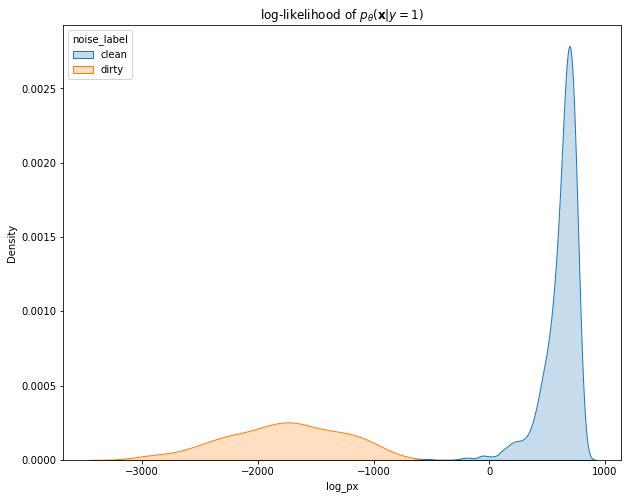

In [65]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

sns.kdeplot(ax=axes, data=df_elbo_iwae, x="log_px", hue="noise_label", fill=True, legend=True)

axes.set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes, "upper left")


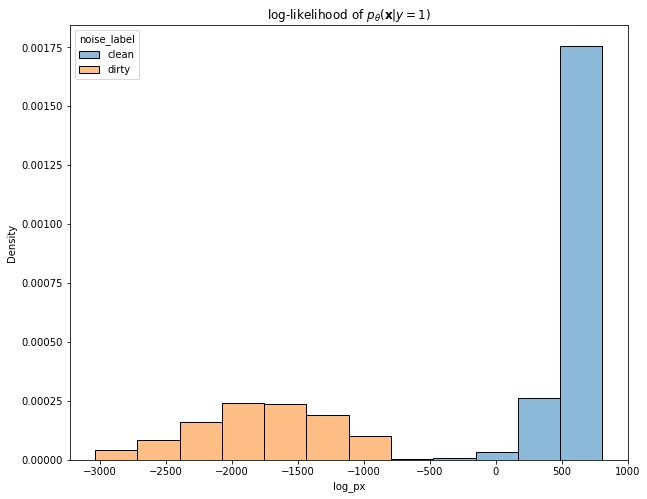

In [66]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

sns.histplot(ax=axes, data=df_elbo_iwae, x="log_px", hue="noise_label", legend=True, stat="density")
axes.set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes, "upper left")


In [72]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins


In [73]:
tops, bin_edges = epdf([log_px_est.numpy().flatten()[~y_noise_instance_train], log_px_est.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [74]:
# Earth Movers Distance (EMD)
np.sum(np.abs(top_model - top_data))

0.013002256174169897

In [75]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [76]:
# Area of intersection between the two histograms
histogram_intersection(tops[0], tops[1], bin_edges)

0.0